## Pre-Procesing

In [1]:
from preprocessing import train_valid_test_split, combine_labels, get_attribute_dims

In [2]:
# Train-Test Split Folders
SOURCE_DATA_DIR = "data/ClothingAttributeDataset/images/"
TARGET_DATA_DIR = "data/ClothingAttributeDataset/"

# Labels File
LABEL_DIR = "data/ClothingAttributeDataset/labels/"
labels_file = "data/labels.csv"
label_values_file = "data/label_values.json"

# Train and Validation Images
TRAIN_IMAGES_FOLDER = "data/ClothingAttributeDataset/train/"
VALID_IMAGES_FOLDER = "data/ClothingAttributeDataset/valid/"

In [3]:
train_valid_test_split(SOURCE_DATA_DIR, TARGET_DATA_DIR, train_size=0.8, valid_size=0.2)

In [4]:
!ls data/ClothingAttributeDataset/train | wc -l

    1484


In [5]:
!ls data/ClothingAttributeDataset/valid | wc -l

     372


In [6]:
labels_df = combine_labels(LABEL_DIR, labels_file, label_values_file)

In [7]:
# binary_columns = ['skin_exposure_GT', 'collar_GT', 'gender_GT', 'scarf_GT', 'necktie_GT',  'placket_GT']
# multi_columns = ['category_GT', 'neckline_GT', 'sleevelength_GT']
    
# color_columns = ['white_GT', 'yellow_GT', 'gray_GT', 'green_GT', 'blue_GT', 'brown_GT', 'red_GT',
#                  'cyan_GT', 'black_GT', 'purple_GT', 'many_colors_GT']
# pattern_columns = ['pattern_spot_GT', 'pattern_solid_GT', 'pattern_graphics_GT', 
#                   'pattern_plaid_GT', 'pattern_stripe_GT', 'pattern_floral_GT']

## Build Models

In [3]:
from classifiers import get_pretrained_model, create_attributes_fc_model

In [4]:
target_dims = get_attribute_dims(label_values_file)

In [5]:
target_dims

{'category_GT': 7,
 'collar_GT': 2,
 'gender_GT': 2,
 'neckline_GT': 3,
 'necktie_GT': 2,
 'pattern_GT': 6,
 'placket_GT': 2,
 'scarf_GT': 2,
 'skin_exposure_GT': 2,
 'sleevelength_GT': 3}

In [9]:
pretrained_conv_model, pretrained_fc, fc_dim = get_pretrained_model("alexnet")

In [10]:
attribute_models = create_attributes_fc_model(pretrained_fc, pretrained_conv_model, fc_dim, 
                                target_dims, "weights/",
                                labels_file, 
                                 TRAIN_IMAGES_FOLDER, 
                                 VALID_IMAGES_FOLDER, 
                                 num_epochs=1, is_train=False)

Processing Attribute: placket_GT
Processing Attribute: category_GT
Processing Attribute: scarf_GT
Processing Attribute: necktie_GT
Processing Attribute: neckline_GT
Processing Attribute: sleevelength_GT
Processing Attribute: skin_exposure_GT
Processing Attribute: gender_GT
Processing Attribute: pattern_GT
Processing Attribute: collar_GT


In [4]:
attribute_models

NameError: name 'attribute_models' is not defined

## Fully FCN Model

In [6]:
pretrained_conv_model, _, _ = get_pretrained_model("vgg16", pop_last_pool_layer=True)

In [ ]:
from classifiers import AttributeFCN, create_attributes_model

In [ ]:
attribute_models = create_attributes_model(AttributeFCN, 512, pretrained_conv_model,
                                target_dims, "weights-fcn/",
                                labels_file, 
                                 TRAIN_IMAGES_FOLDER, 
                                 VALID_IMAGES_FOLDER, 
                                 num_epochs=1, is_train=True)

In [ ]:
# attribute_models = create_attributes_model(pretrained_fc, pretrained_conv_model, fc_dim, target_dims, "weights-fcn/",
#                                 labels_file, 
#                                  TRAIN_IMAGES_FOLDER, 
#                                  VALID_IMAGES_FOLDER, 
#                                  num_epochs=1, is_train=True)

## Evaluate the Model

In [8]:
import numpy as np
from scipy.misc import imread, imsave, imresize
from matplotlib import pyplot as plt

%matplotlib inline

/Users/sampathweb/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
from preprocessing import image_loader, load_label_values
from classifiers import predict_attributes

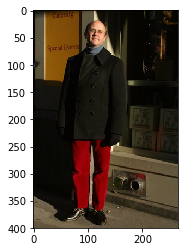

In [10]:
img = imread("data/ClothingAttributeDataset/valid/000046.jpg")
plt.imshow(img)

In [11]:
# pretrained_conv_model = pretrained_conv_model.eval()

In [12]:
label_values = load_label_values(label_values_file)

In [13]:
image_url = "data/ClothingAttributeDataset/valid/000046.jpg"
results = predict_attributes(image_url, pretrained_conv_model, attribute_models, 
                             attribute_idx_map=label_values["idx_to_names"])

In [14]:
label_values["idx_to_names"]

{'category_GT': {0: 'Shirt',
  1: 'Sweater',
  2: 'T-shirt',
  3: 'Outerwear',
  4: 'Suit',
  5: 'Tank Top',
  6: 'Dress'},
 'collar_GT': {0: None, 1: 'Has Collar'},
 'gender_GT': {0: 'Is Female', 1: 'Is Male'},
 'neckline_GT': {0: 'V-shape', 1: 'Round', 2: 'Other shapes'},
 'necktie_GT': {0: None, 1: 'Wears Necktie'},
 'pattern_GT': {0: 'Floral',
  1: 'Graphics',
  2: 'Plaid',
  3: 'Stripe',
  4: 'Solid',
  5: 'Spot'},
 'placket_GT': {0: None, 1: 'Has Placket'},
 'scarf_GT': {0: None, 1: 'Wears Scarf'},
 'skin_exposure_GT': {0: None, 1: 'sees high skin exposure'},
 'sleevelength_GT': {0: 'No sleeves', 1: 'Short sleeves', 2: 'Long sleeves'}}

In [15]:
results

{'category_GT': ('Suit', 0.30696633),
 'collar_GT': ('Has Collar', 0.87921095),
 'gender_GT': ('Is Male', 0.80124891),
 'neckline_GT': ('V-shape', 0.71205533),
 'pattern_GT': ('Solid', 0.70339167),
 'placket_GT': ('Has Placket', 0.80256134),
 'sleevelength_GT': ('Long sleeves', 0.95963126)}

In [85]:
# out_features.data.cpu().cpu().numpy()

array([[ 0.20522568,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [24]:
out_features = get_pretrained_features(pretrained_features, image)

In [25]:
predict_attribute(models["neckline_GT"], out_features)

Variable containing:
 0.8101  0.1670  0.0229
[torch.FloatTensor of size 1x3]

In [26]:
out_features

Variable containing:
  0.0000   1.2854   1.2854  ...    3.0420   4.7316   3.7730
[torch.FloatTensor of size 1x9216]

In [27]:
pretrained_fc(out_features.cpu())

Variable containing:
 -5.0137  -6.2599  -2.7904  ...   -9.9542  -1.1010   1.2046
[torch.FloatTensor of size 1x1000]

In [49]:
out_features

Variable containing:
  0.0000   0.0000   0.0000  ...    7.7006   5.8663   1.4132
[torch.cuda.FloatTensor of size 1x9216 (GPU 0)]

In [55]:
models["neckline_GT"](out_features.cuda())

Variable containing:
 0.0575  0.9410  0.0015
[torch.cuda.FloatTensor of size 1x3 (GPU 0)]

In [56]:
## Confusion Matrix

In [57]:
for data in dset_loaders["train"]:
    inputs, labels = data
    if use_gpu:
        X = Variable(inputs.cuda())
    else:
        X = Variable(inputs)
    results = model(X)
    if use_gpu:
        results = results.cpu()
    break

NameError: name 'dset_loaders' is not defined